# **COVID 19 - DATA SCIENCE PROJECT**

<u style="font-weight:600; font-size: 18px;">Objectif du projet :</u> À partir de l'ensemble de données à notre disposition, nous souhaitons mettre en place un modèle de Machine Learning capable de prédire si une personne est infectée ou pas.

<u style="font-weight:600; font-size: 18px;">Métriques :</u> Accuracy → 90%

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importation des données

In [191]:
df_original = pd.read_excel('./datasets/dataset.xlsx')
df_original.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Au premier coup d'œil du dataset, on remarque que :
- Le nom de chaque colonne est sous un mauvais format
- Certaines colonnes semblent ne contenir que des valeurs manquantes NaN
- La colonne target est 'SARS-Cov-2 exam result'

## Exploratory Data Analysis (EDA)

In [192]:
df = df_original.copy()
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Dimensions du dataset

In [193]:
print(f"Nombre de colonnes : {df.shape[1]}\nNombre de lignes : {df.shape[0]}")

Nombre de colonnes : 111
Nombre de lignes : 5644


**Remarque :** Nous avons un grand nombre de variables, il faudra donc réduire la dimensionnalité

- Formatage du nom des colonnes

In [194]:
def format_col_name(col_name_ : str) -> str:
    """
    Formats a column name by converting it to lowercase, replacing spaces with underscores,
    and trimming unnecessary whitespace. If the input contains a parenthesis, the function
    only processes the substring before the parenthesis.

    :param col_name_: The name of the column to be formatted.
    :return: The formatted column name with spaces replaced by underscores and converted
        to lowercase.
    """
    if col_name_.find('(') == -1:
        return col_name_.strip(' ').replace(' ', '_').lower()
    return col_name_[ :col_name_.find('(')].strip(' ').replace(' ', '_').lower()

In [195]:
df.rename(columns={col : format_col_name(col) for col in df.columns}, inplace=True)

In [196]:
df.columns

Index(['patient_id', 'patient_age_quantile', 'sars-cov-2_exam_result',
       'patient_addmited_to_regular_ward',
       'patient_addmited_to_semi-intensive_unit',
       'patient_addmited_to_intensive_care_unit', 'hematocrit', 'hemoglobin',
       'platelets', 'mean_platelet_volume',
       ...
       'hb_saturation', 'pco2', 'base_excess', 'ph', 'total_co2', 'hco3',
       'po2', 'arteiral_fio2', 'phosphor', 'cto2'],
      dtype='object', length=111)

- Types de variables

In [197]:
df.dtypes.sort_values()

patient_age_quantile                         int64
patient_addmited_to_regular_ward             int64
patient_addmited_to_semi-intensive_unit      int64
patient_addmited_to_intensive_care_unit      int64
cto2                                       float64
                                            ...   
urine_-_bile_pigments                       object
urine_-_ketone_bodies                       object
urine_-_nitrite                             object
urine_-_protein                             object
strepto_a                                   object
Length: 111, dtype: object

In [198]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
Name: count, dtype: int64

- Valeurs manquantes NaN

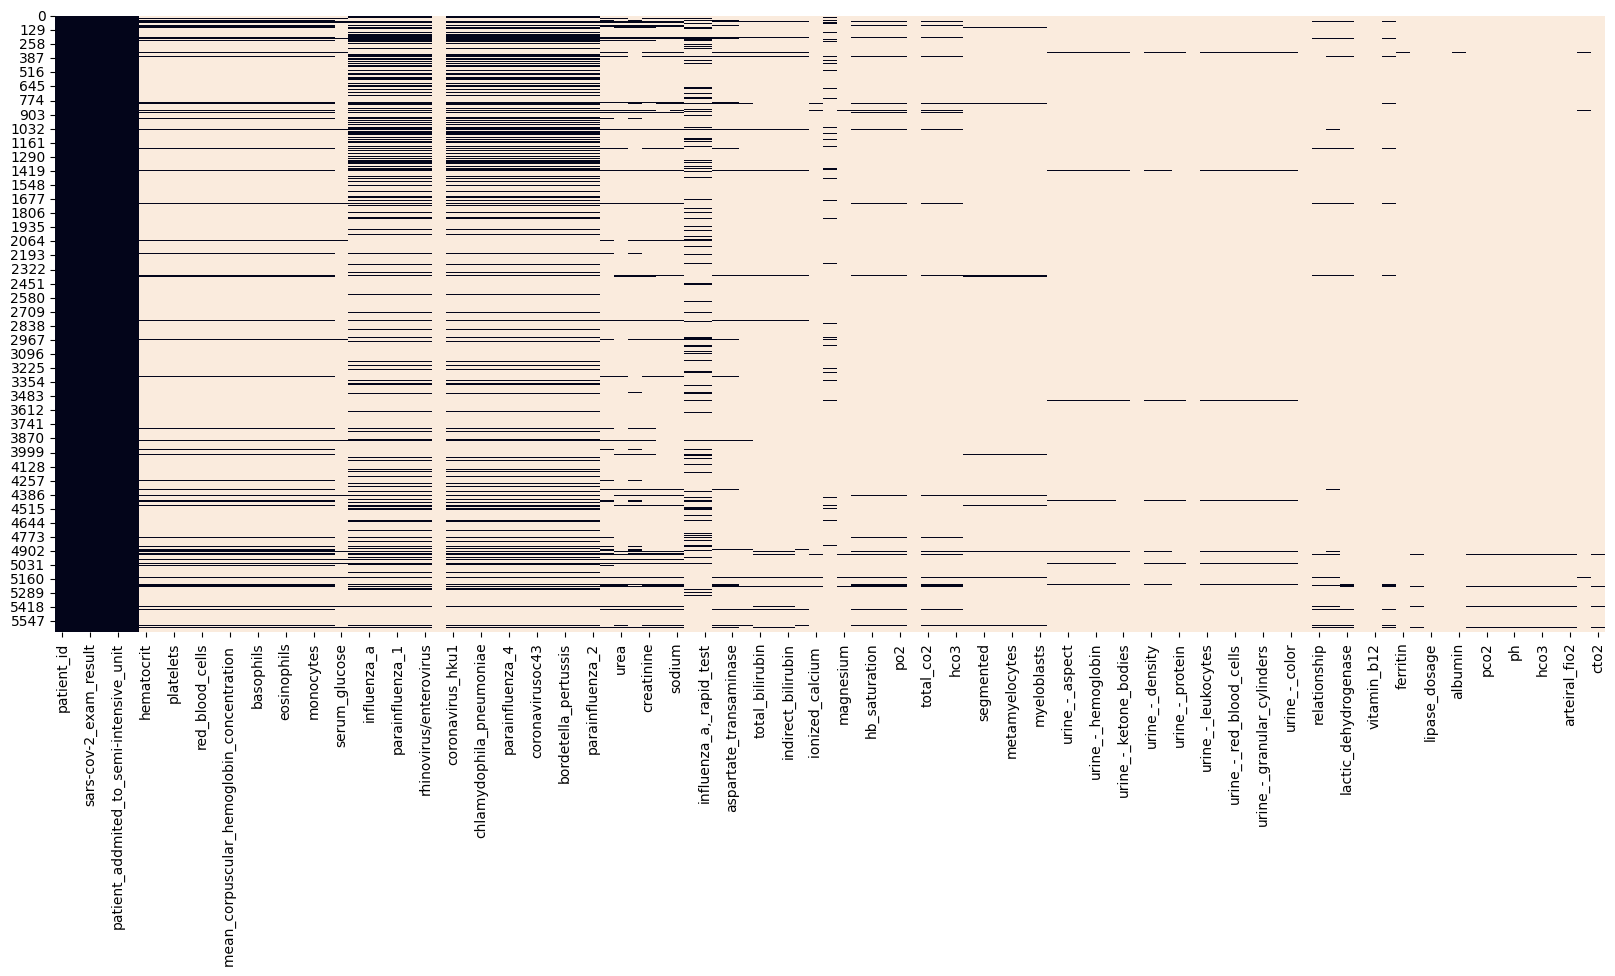

In [199]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.isna(), cbar=False)
plt.show()

In [200]:
columns_NaN = (df.isnull().sum() * 100 / df.shape[0]).round(2).sort_values()
columns_NaN

patient_id                                   0.0
patient_age_quantile                         0.0
sars-cov-2_exam_result                       0.0
patient_addmited_to_regular_ward             0.0
patient_addmited_to_semi-intensive_unit      0.0
                                           ...  
mycoplasma_pneumoniae                      100.0
urine_-_sugar                              100.0
prothrombin_time                           100.0
partial_thromboplastin_time                100.0
d-dimer                                    100.0
Length: 111, dtype: float64

**Remarque :** Une bonne partie des colonnes/variables ont plus de 90% de valeurs manquantes ; Du coup, on va les supprimer dans un premier temps, parce qu'à ce stade, on ne peut rien de plus pour récupérer ce trop-plein de valeurs manquantes.

In [201]:
df = df.drop(columns=[col for col, val in zip(columns_NaN.index, columns_NaN.values) if val > 90])

In [202]:
df = df.drop(columns='patient_id')

- Visualisation de la target

<BarContainer object of 2 artists>

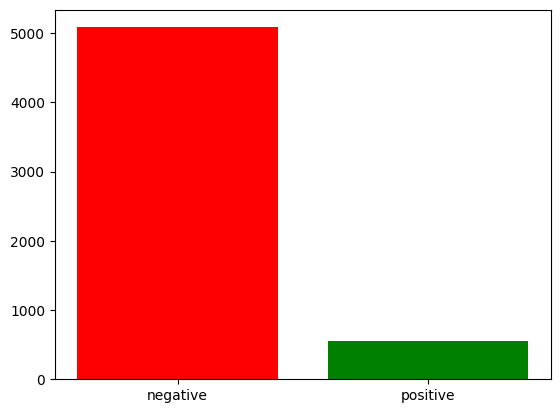

In [203]:
target = "sars-cov-2_exam_result"
target_grouped = df.groupby(target)[target].count()
plt.bar(x=target_grouped.index, height=target_grouped.values, color=['red', 'green'])

**Remarque :** La répartition des résultats est déséquilibrée
1. On utilisera une métrique propre pour évaluer notre modèle dans ce genre de situation
2. On utilisera une méthode adaptée pour la division du datasets, train et test set

- Visualisation des features

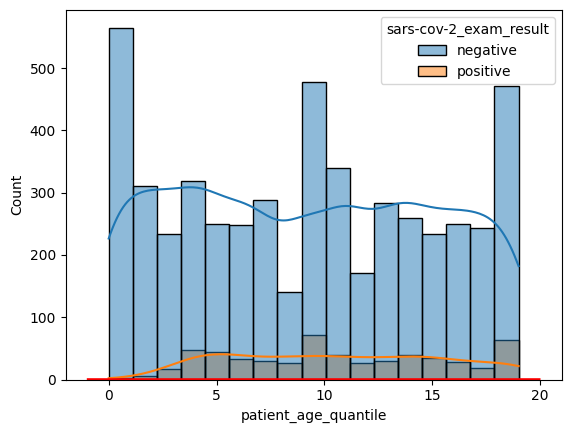

In [204]:
from scipy.stats import norm

sns.histplot(df, x="patient_age_quantile", hue="sars-cov-2_exam_result", kde=True)

# Courbe de la distribution normale de cette feature
mu, std = norm.fit(df["patient_age_quantile"])
x_min, x_max = plt.xlim()
x_kde = np.linspace(x_min, x_max, df["patient_age_quantile"].count())
p = norm.pdf(x_kde, mu, std)

plt.plot(x_kde, p, linewidth=2, color="red")

plt.show()

1. Variable difficile à interpreter, car manque d'infos sur l'échelle réelle des âges.
2. Pas de distribution normale ou de forme particulière ici.

Variables booléennes (0 ou 1)

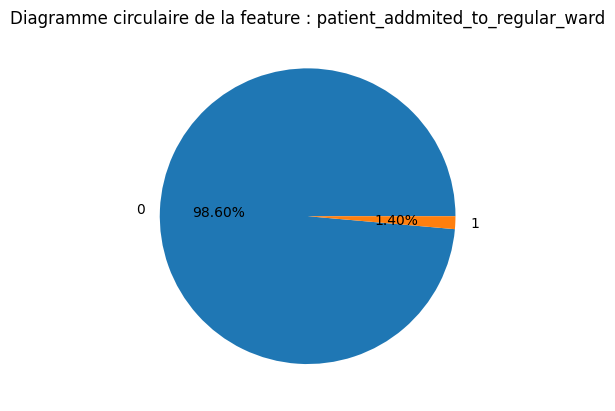

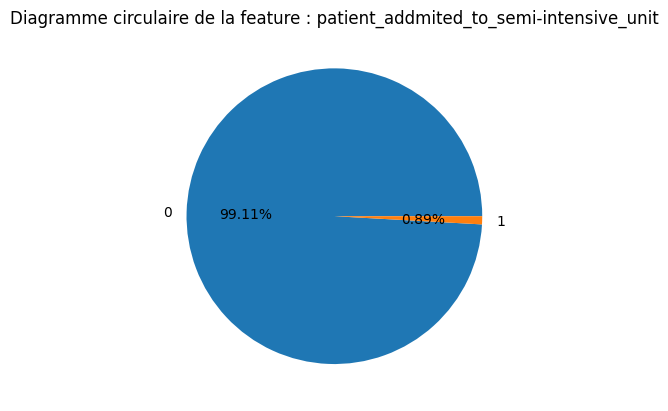

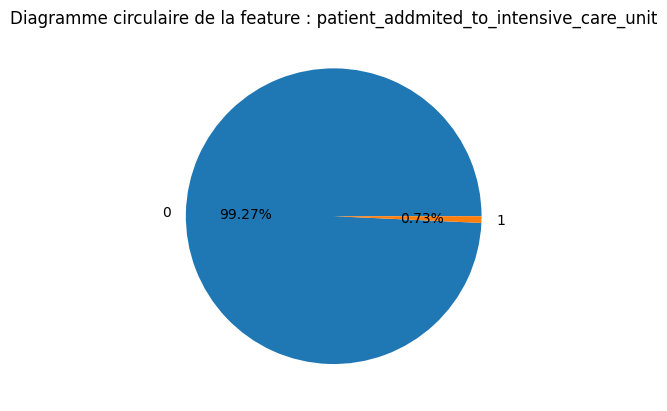

In [205]:
columns = [
    "patient_addmited_to_regular_ward",
    "patient_addmited_to_semi-intensive_unit",
    "patient_addmited_to_intensive_care_unit"
]
for col in columns:
    feature_grouped = df.groupby(col)[col].count()

    plt.title(f"Diagramme circulaire de la feature : {col}")
    plt.pie(x=feature_grouped.values, labels=feature_grouped.index, autopct="%.2f%%")
    plt.show()

Pour ces trois variables on a très peu de valeurs `1` donc il est possible que cette variable n'est pas d'intérêt pour notre modèle

Variables continues

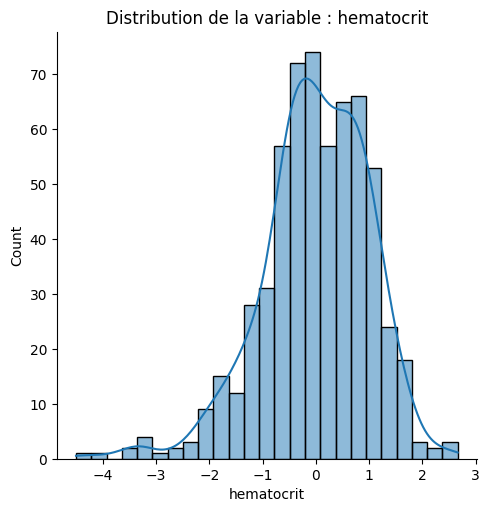

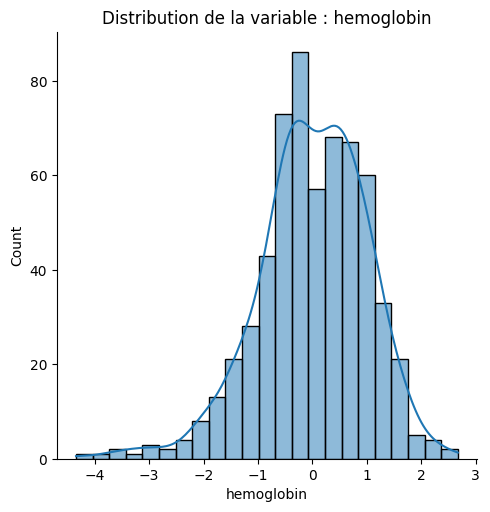

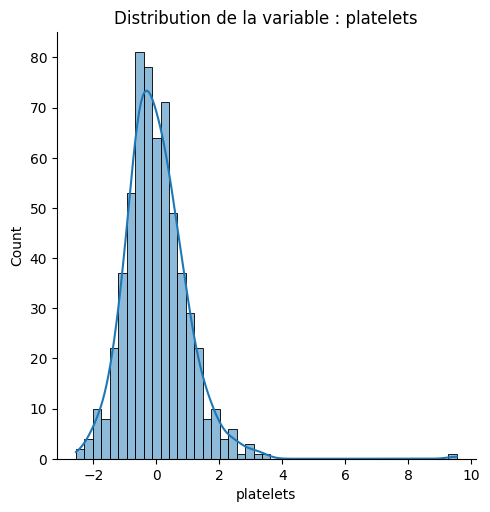

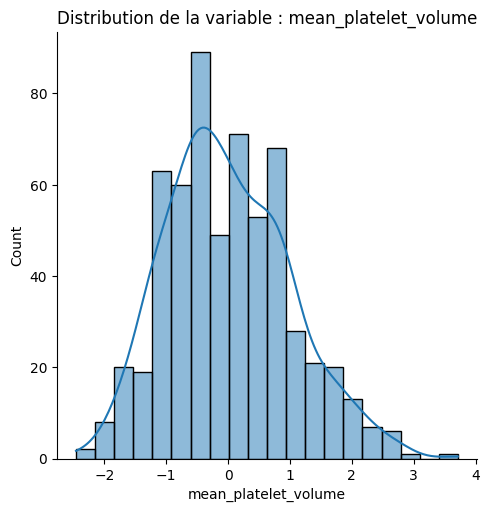

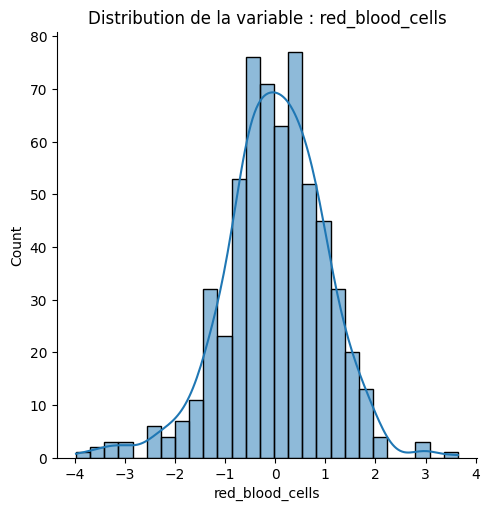

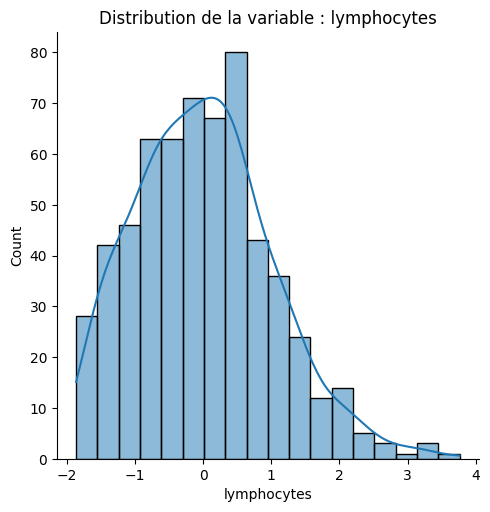

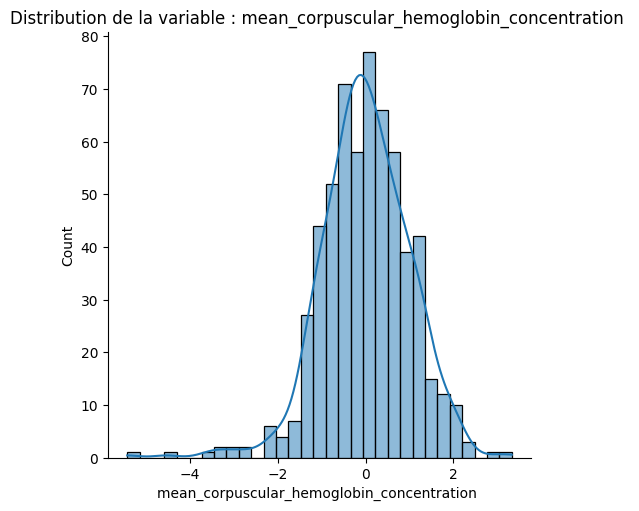

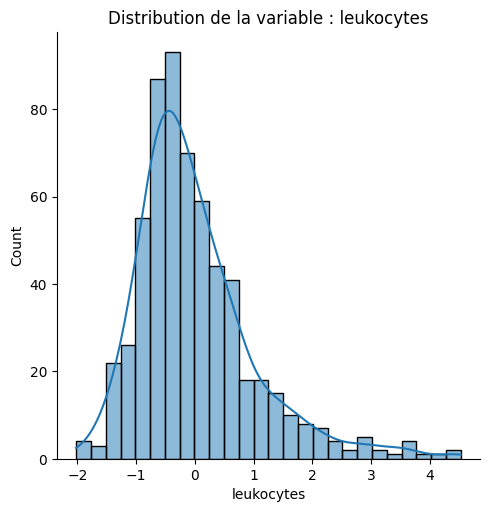

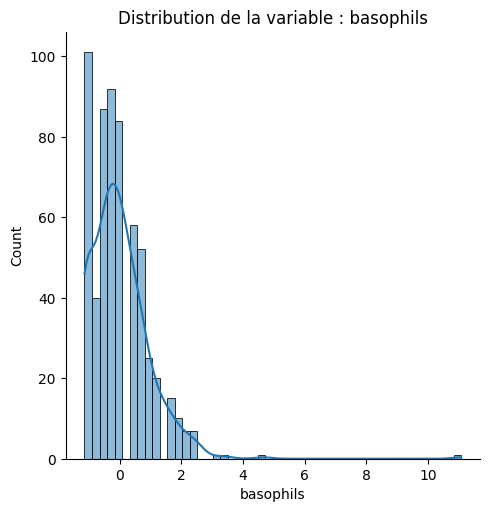

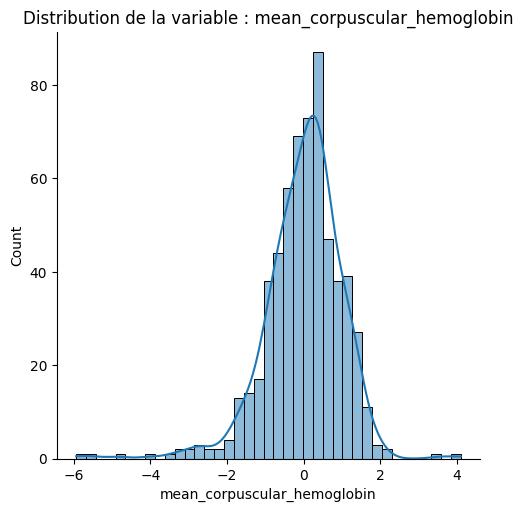

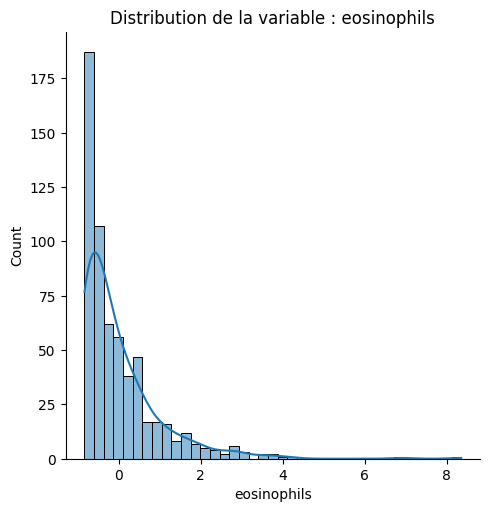

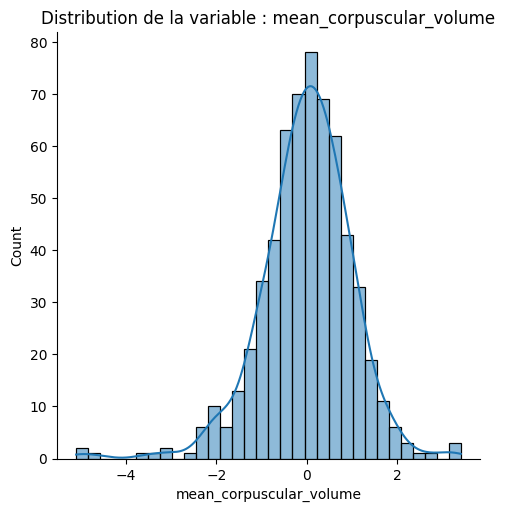

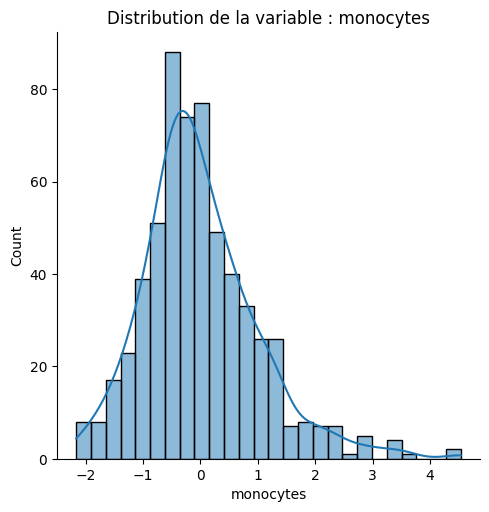

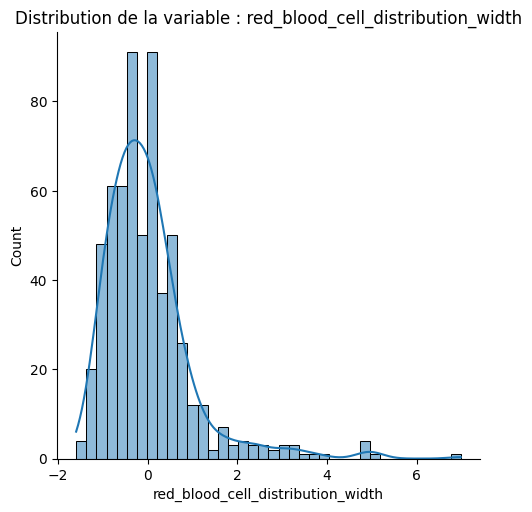

In [210]:
for col in df.select_dtypes(include='float'):
    sns.displot(df[col], kde=True)
    plt.title(f"Distribution de la variable : {col}")
    plt.show()

**Remarque :**
1. La plupart de ces variables semblent avoir été standardisées vu qu'elles sont centrés en 0 et ont à peu près un `std` égale à 1.
2. Certaines suivent une distribution normale et d'autres sont plutôt asymétriques (skewness).

On peut ici réaliser des tests de normalité, mieux Standardiser ces données et calculer le skewness